In [364]:
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [365]:
# Load test data
test_df = pd.read_csv("cleaned_test.csv")
customer_ids = test_df['Customer_ID']
test_df

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
0,33574,1,2686.50,3582.00,12537.00
1,10089,1,1717.56,2576.34,9446.58
2,38329,1,854.04,1242.24,5201.88
3,11376,1,1638.12,2320.67,9282.68
4,12410,1,1039.09,1518.67,5435.24
...,...,...,...,...,...
40744,33698,21,3916.48,4161.26,3916.48
40745,4185,21,3191.92,3004.16,3098.04
40746,28664,21,3838.60,3951.50,3700.00
40747,11874,21,4313.76,4183.04,4313.76


In [366]:
print(test_df.isnull().sum())

Customer_ID     0
outlet_city     0
luxury_sales    0
fresh_sales     0
dry_sales       0
dtype: int64


In [367]:
scaler = StandardScaler()
scaler.fit(test_df)
test_scaled = scaler.transform(test_df)

In [368]:
with open("finalized_model.sav", "rb") as f:
    model = pickle.load(f)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 30 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [369]:
features = ['luxury_sales', 'fresh_sales', 'dry_sales', 'outlet_city']
X_test = test_df[features].copy()

In [370]:
scaler.fit(test_df[features])

StandardScaler()

In [371]:
X_test_scaled = scaler.transform(X_test)

In [372]:
print(X_test_scaled.shape)

(40749, 4)


In [373]:
predictions = model.predict(X_test_scaled)

1274/1274 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [374]:
# Confirm dimensions match
assert len(predictions) == len(customer_ids), "Prediction length mismatch with customer IDs."

In [375]:
import numpy as np

# Get class predictions from probability output
predictions = model.predict(X_test_scaled)
predicted_classes = np.argmax(predictions, axis=1)  # Converts from shape (n_samples, n_classes) to (n_samples,)

1274/1274 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [376]:
# Now create the output DataFrame
output_df = pd.DataFrame({
    'Customer_ID': customer_ids,
    'outlet_city': X_test['outlet_city'],
    'luxury_sales': X_test['luxury_sales'],
    'fresh_sales': X_test['fresh_sales'],
    'dry_sales': X_test['dry_sales'],
    'predicted_customer_segmentation': predicted_classes
})

In [377]:
# Save to CSV
output_df.to_csv("predicted_customer_segmentations.csv", index=False)
print("✅ Prediction complete. File saved: predicted_customer_segmentations.csv")

✅ Prediction complete. File saved: predicted_customer_segmentations.csv


In [378]:
pred = pd.read_csv("predicted_customer_segmentations.csv")
pred

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,predicted_customer_segmentation
0,33574,1,2686.50,3582.00,12537.00,0
1,10089,1,1717.56,2576.34,9446.58,0
2,38329,1,854.04,1242.24,5201.88,0
3,11376,1,1638.12,2320.67,9282.68,0
4,12410,1,1039.09,1518.67,5435.24,0
...,...,...,...,...,...,...
40744,33698,21,3916.48,4161.26,3916.48,4
40745,4185,21,3191.92,3004.16,3098.04,4
40746,28664,21,3838.60,3951.50,3700.00,4
40747,11874,21,4313.76,4183.04,4313.76,4


In [379]:
print(pred.isnull().sum())

Customer_ID                        0
outlet_city                        0
luxury_sales                       0
fresh_sales                        0
dry_sales                          0
predicted_customer_segmentation    0
dtype: int64


In [380]:
# adding a new column
pred['total_sales'] = pred['luxury_sales'] + pred['fresh_sales'] + pred['dry_sales']
pred

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,predicted_customer_segmentation,total_sales
0,33574,1,2686.50,3582.00,12537.00,0,18805.50
1,10089,1,1717.56,2576.34,9446.58,0,13740.48
2,38329,1,854.04,1242.24,5201.88,0,7298.16
3,11376,1,1638.12,2320.67,9282.68,0,13241.47
4,12410,1,1039.09,1518.67,5435.24,0,7993.00
...,...,...,...,...,...,...,...
40744,33698,21,3916.48,4161.26,3916.48,4,11994.22
40745,4185,21,3191.92,3004.16,3098.04,4,9294.12
40746,28664,21,3838.60,3951.50,3700.00,4,11490.10
40747,11874,21,4313.76,4183.04,4313.76,4,12810.56


In [381]:
outlet_city_map = {
    1: 'Batticaloa',
    2: 'Colombo',
    3: 'Dehiwala-Mount Lavinia',
    4: 'Anuradhapura',
    5: 'Galle',
    6: 'Gampaha',
    7: 'Homagama',
    8: 'Jaffna',
    9: 'Kaduwela',
    10: 'Kalmunai',
    11: 'Kandy',
    12: 'Katunayake',
    13: 'Kelaniya',
    14: 'Madawachiya',
    15: 'Kotte',
    16: 'Moratuwa',
    17: 'Negombo',
    18: 'Nuwara Eliya',
    19: 'Panadura',
    20: 'Peliyagoda',
    21: 'Trincomalee',
    22: 'Wattala'
}
pred['outlet_city'] = pred['outlet_city'].map(outlet_city_map)

In [382]:
pred['predicted_customer_segmentation'] = pred['predicted_customer_segmentation'].map({0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6})


In [383]:
#contigency table for outlet city
contigency_table = pd.crosstab(pred['outlet_city'], pred['predicted_customer_segmentation'])
contigency_table

predicted_customer_segmentation,1,2,3,4,5,6
outlet_city,,,,,,
Anuradhapura,0,0,259,0,0,197
Batticaloa,938,0,257,0,0,924
Colombo,907,0,118,68,127,872
Dehiwala-Mount Lavinia,116,722,213,824,0,106
Galle,986,0,181,0,74,957
Gampaha,0,848,0,866,216,0
Homagama,1061,0,246,0,0,919
Jaffna,0,795,0,937,211,0
Kaduwela,1105,0,263,0,0,865


In [384]:
# Create contingency table and compute total customers per city
city_totals = pd.crosstab(pred['outlet_city'], pred['predicted_customer_segmentation']).sum(axis=1)

# Classify cities based on whether their total is above median
area_mapping = (city_totals > city_totals.median()).map({True: 'Urban', False: 'Suburban'}).to_dict()

# Map classification back to the original dataset
pred['Area'] =  pred['outlet_city'].map(area_mapping)

# View updated dataset
pred

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,predicted_customer_segmentation,total_sales,Area
0,33574,Batticaloa,2686.50,3582.00,12537.00,1,18805.50,Urban
1,10089,Batticaloa,1717.56,2576.34,9446.58,1,13740.48,Urban
2,38329,Batticaloa,854.04,1242.24,5201.88,1,7298.16,Urban
3,11376,Batticaloa,1638.12,2320.67,9282.68,1,13241.47,Urban
4,12410,Batticaloa,1039.09,1518.67,5435.24,1,7993.00,Urban
...,...,...,...,...,...,...,...,...
40744,33698,Trincomalee,3916.48,4161.26,3916.48,5,11994.22,Suburban
40745,4185,Trincomalee,3191.92,3004.16,3098.04,5,9294.12,Suburban
40746,28664,Trincomalee,3838.60,3951.50,3700.00,5,11490.10,Suburban
40747,11874,Trincomalee,4313.76,4183.04,4313.76,5,12810.56,Suburban


In [385]:
# remove missing values from outlet city and area
pred = pred.dropna(subset=['outlet_city', 'Area'])

<ipython-input-386-2268517085>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='predicted_customer_segmentation', data=output_df, palette='viridis')


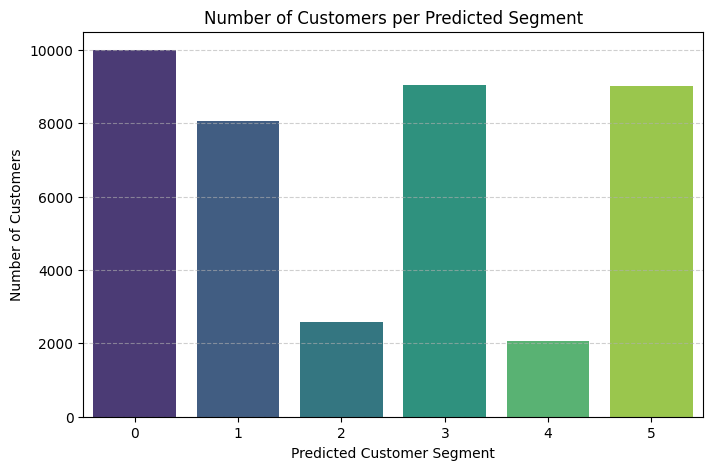

In [386]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count how many customers in each predicted segment
plt.figure(figsize=(8, 5))
sns.countplot(x='predicted_customer_segmentation', data=output_df, palette='viridis')

plt.title('Number of Customers per Predicted Segment')
plt.xlabel('Predicted Customer Segment')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

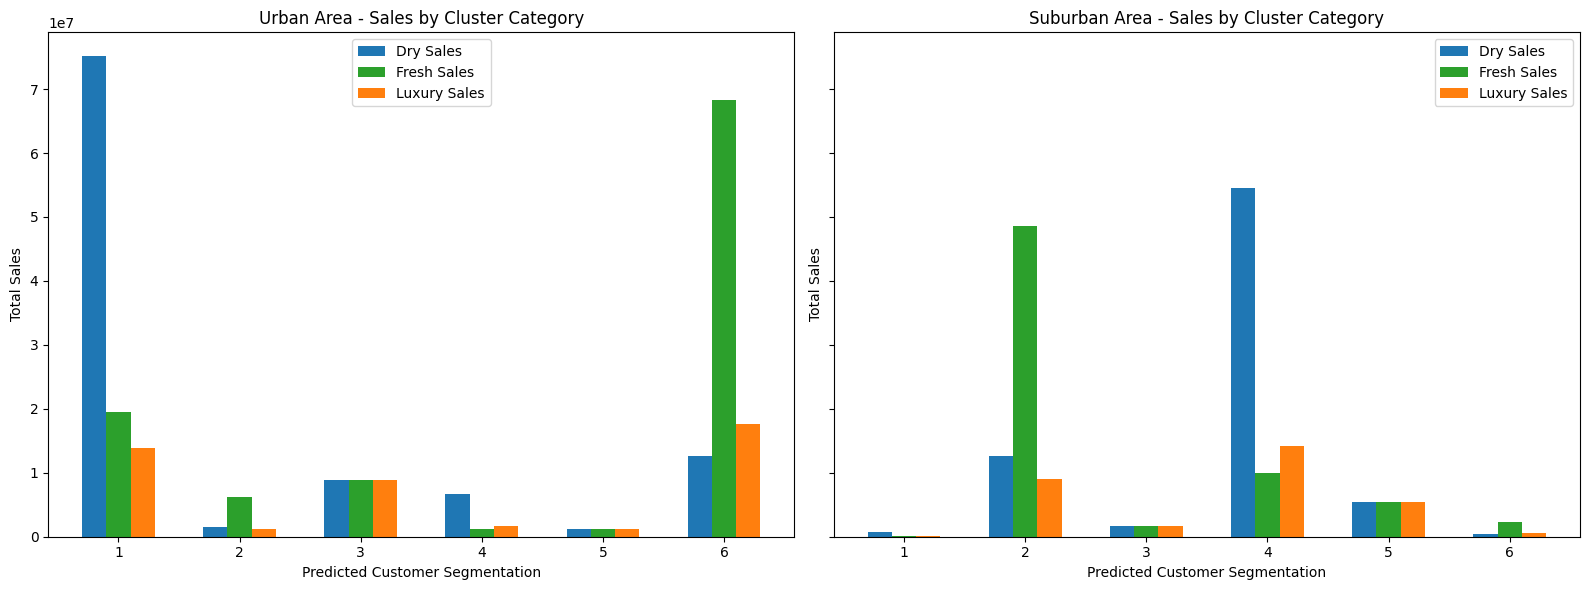

In [387]:
# Group and prepare data
grouped = pred.groupby(['Area', 'predicted_customer_segmentation'])[['dry_sales', 'fresh_sales', 'luxury_sales']].sum().reset_index()
sales_types = ['dry_sales', 'fresh_sales', 'luxury_sales']
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']

# Plot setup
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
bar_width = 0.2

# Loop through Urban and Suburban
for i, area in enumerate(['Urban', 'Suburban']):
    area_data = grouped[grouped['Area'] == area]
    x = np.arange(len(area_data))

    for j, sale_type in enumerate(sales_types):
        axes[i].bar(x + j * bar_width, area_data[sale_type], width=bar_width, label=sale_type.replace('_', ' ').title(), color=colors[j])

    axes[i].set_title(f'{area} Area - Sales by Cluster Category')
    axes[i].set_xlabel('Predicted Customer Segmentation')
    axes[i].set_ylabel('Total Sales')
    axes[i].set_xticks(x + bar_width)
    axes[i].set_xticklabels(area_data['predicted_customer_segmentation'].astype(str))
    axes[i].legend()

plt.tight_layout()
plt.show()

In [388]:
# download csv
pred.to_csv('predicted_customer_segmentations.csv', index=False)

In [389]:
import gspread
from google.auth import default
from gspread_dataframe import set_with_dataframe

# Authenticate with your Google Account
creds, _ = default()
gc = gspread.authorize(creds)

In [390]:
# Create new Google Sheet
spreadsheet = gc.create('Predicted Customer Segmentation')

# Select the first worksheet
worksheet = spreadsheet.get_worksheet(0)

# Write the DataFrame to the sheet
set_with_dataframe(worksheet, pred)

spreadsheet.share('haritha.20230858@iit.ac.lk', perm_type='user', role='writer')

<Response [200]>

In [391]:
print(spreadsheet.url)

https://docs.google.com/spreadsheets/d/1abb5gtI-rjDLma7oVLFUNk0DRoq4_daemH76cXwfcoQ
